<a href="https://colab.research.google.com/github/barkhahbpp/sistem-cerdas/blob/main/Lung_Cancer_MLP_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Lung Cancer dengan Menggunakan MLP #

Dataset : https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

## Load Dataset ##

Detil Fitur Data adalah sebagai berikut :

|Field name|Description|
|--- |--- |
|Age	|The age of the patient. (Numeric)|
|Gender	|The gender of the patient. (Categorical)|
|Air Pollution |The level of air pollution exposure of the patient. (Categorical)|
|Alcohol use	|The level of alcohol use of the patient. (Categorical)|
|Dust Allergy	|The level of dust allergy of the patient. (Categorical)|
|OccuPational Hazards	|The level of occupational hazards of the patient. (Categorical)|
|Genetic Risk	|The level of genetic risk of the patient. (Categorical)|
|chronic Lung Disease	|The level of chronic lung disease of the patient. (Categorical)|
|Balanced Diet	|The level of balanced diet of the patient. (Categorical)|
|Obesity	|The level of obesity of the patient. (Categorical)|
|Smoking	|The level of smoking of the patient. (Categorical)|
|Passive Smoker	|The level of passive smoker of the patient. (Categorical)|
|Chest Pain	|The level of chest pain of the patient. (Categorical)|
|Coughing of Blood	|The level of coughing of blood of the patient. (Categorical)|
|Fatigue	|The level of fatigue of the patient. (Categorical)|
|Weight Loss	|The level of weight loss of the patient. (Categorical)|
|Shortness of Breath	|The level of shortness of breath of the patient. (Categorical)|
|Wheezing	|The level of wheezing of the patient. (Categorical)|
|Swallowing Difficulty	|The level of swallowing difficulty of the patient. (Categorical)|
|Clubbing of Finger Nails	|The level of clubbing of finger nails of the patient. (Categorical)|

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Berikut adalah proses Load Data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [16]:
lungCr_df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/cancer patient data sets.csv')
lungCr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [19]:
lungCr_df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Data Preprocessiong ##

In [21]:
# Cek Record Redundant
sum(lungCr_df.duplicated())

0

In [23]:
# cek PAtient ID Duplicate
sum(lungCr_df["Patient Id"].duplicated())

0

<ipython-input-26-1f961e451aca>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(lungCr_df.corr(), annot=True, center=0.5)


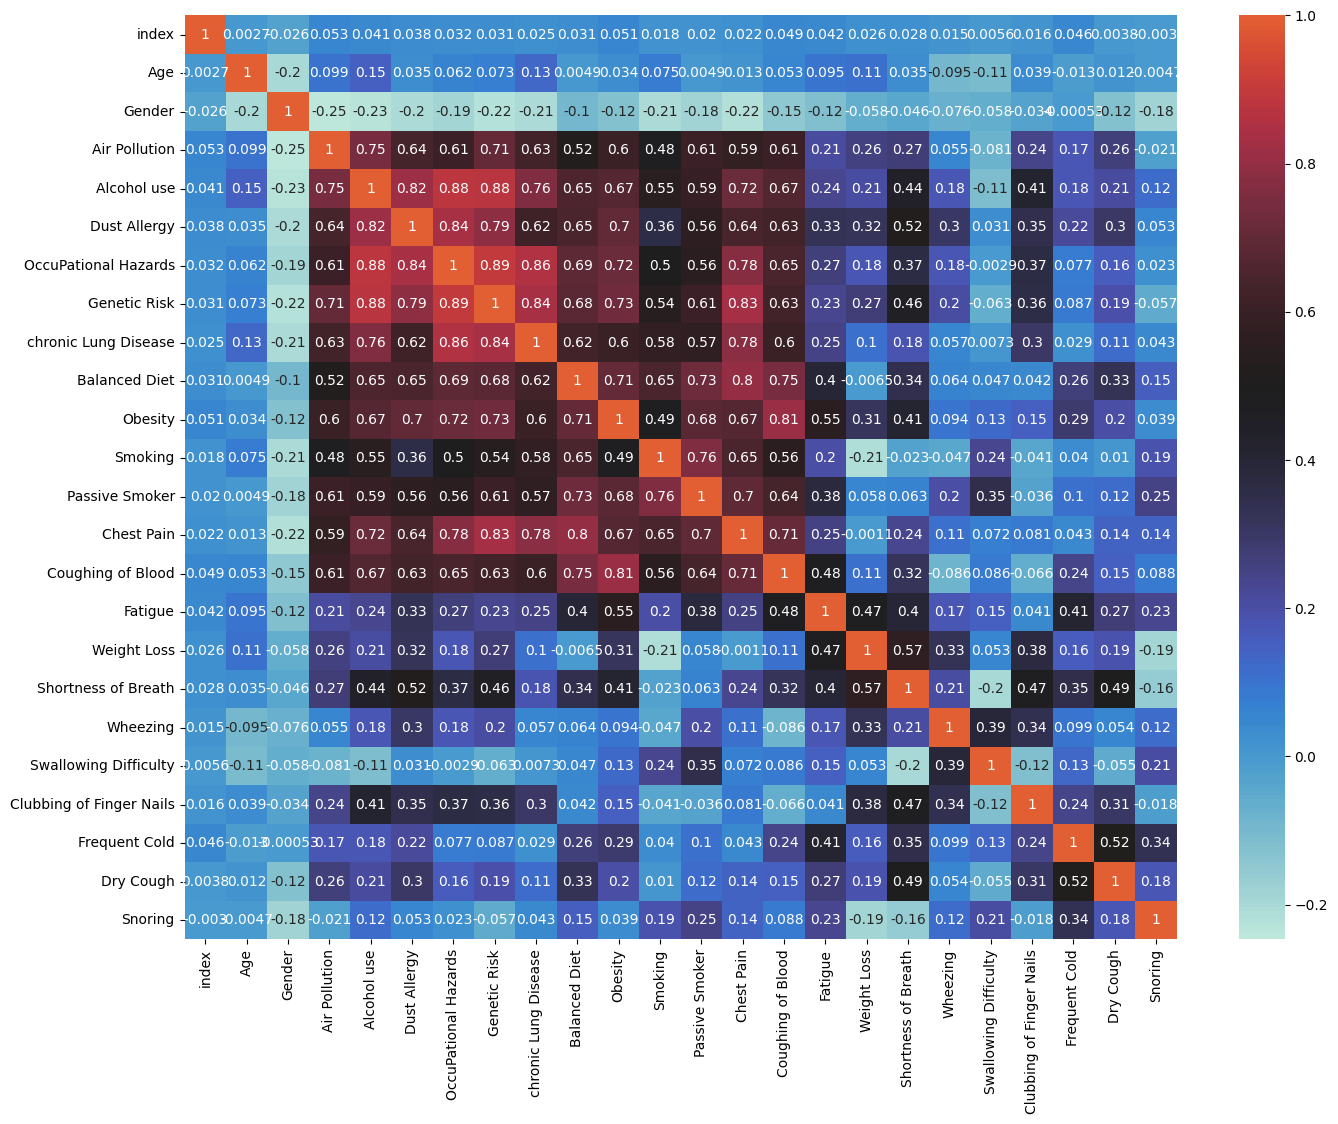

In [26]:

%matplotlib inline
plt.figure(figsize=(16,12))

sns.heatmap(lungCr_df.corr(), annot=True, center=0.5)
plt.show()
